# This notebook is intended to sample data from source

## Import essential libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Some functions to help us

In [3]:
def retrieve_month_data(year, month, folder_path):
    # Format the year and month to match the file naming convention
    year_str = str(year)
    month_str = f'{month:02d}'

    # Define the pattern to match files for the given year and month
    file_pattern = f'citi_{year_str}{month_str}_*.csv'

    file_paths = glob.glob(os.path.join(folder_path, file_pattern))

    dfs = []

    for file in file_paths:
        df = pd.read_csv(file)
        dfs.append(df)

    # Combine all the dataframes into one
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

In [16]:
def retrieve_sampled_month_data(year, month, folder_path, fraction=0.01, random_state=42):
    all_month_data = retrieve_month_data(year, month, folder_path)
    sampled_df = all_month_data.sample(frac=fraction, random_state=42)
    sampled_df = sampled_df.drop(columns=['Unnamed: 0'])
    return sampled_df

In [5]:
def retrieve_sampled_year_data(year, folder_path, fraction=0.01):
    sampled_dfs = []

    for month in range(1, 13):
        # Retrieve & Sample
        sampled_df = retrieve_sampled_month_data(year, month, folder_path, random_state=42)

        # Append
        sampled_dfs.append(sampled_df)

    # Combine
    combined_sampled_df = pd.concat(sampled_dfs, ignore_index=True)

    #data type check
    combined_sampled_df = date_feature_engineering(combined_sampled_df)

    return combined_sampled_df

In [35]:
def date_feature_engineering(given_df):
    given_df['started_at'] = pd.to_datetime(given_df['started_at'])
    given_df['ended_at'] = pd.to_datetime(given_df['ended_at'])
    given_df['ride_date'] = given_df['started_at'].dt.date
    given_df['ride_year'] = given_df['started_at'].dt.year
    given_df['ride_month'] = given_df['started_at'].dt.month
    given_df['ride_day'] = given_df['started_at'].dt.day

    # check if it's weekend or not
    given_df['ride_date'] = pd.to_datetime(given_df['ride_date'])
    given_df['is_weekend'] = given_df['ride_date'].dt.weekday.isin([5, 6])

    # calculate the duration of the ride
    given_df['duration'] = given_df['ended_at'] - given_df['started_at']
    given_df['duration_minutes'] = round(given_df['duration'].dt.total_seconds() / 60, 1)

    given_df = given_df.reset_index(drop=True)
    return given_df

## Data Source & Retrieve Data
Data can be accessed from https://citibikenyc.com/system-data

In [17]:
folder_path = "/content/drive/MyDrive/afterschool_projects/ny_bike/citibike-tripdata"
data202407 = retrieve_sampled_month_data(2024, 7, folder_path, fraction=0.01, random_state=42)

<ipython-input-3-5273e4aef4bf>:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-3-5273e4aef4bf>:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-3-5273e4aef4bf>:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-3-5273e4aef4bf>:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-3-5273e4aef4bf>:14: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [27]:
data202407.shape

(47086, 17)

In [28]:
data202407.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [29]:
data202407 = data202407.dropna()

In [30]:
data202407.shape

(47086, 17)

In [31]:
data202407.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_date,ride_year,ride_month,ride_day
1120985,C00A9E6382932E6A,classic_bike,2024-07-09 12:03:39.969,2024-07-09 12:08:49.318,Broadway & W 157 St,8123.06,St Nicholas Ave & W 155 St,8085.05,40.834027,-73.945108,40.830663,-73.941323,member,2024-07-09,2024,7,9
619370,031CE5705DA05DF7,electric_bike,2024-07-14 13:57:05.636,2024-07-14 14:23:00.581,E 23 St & 1 Ave,5929.01,E 93 St & 2 Ave,7286.02,40.736502,-73.978095,40.782454,-73.948920,member,2024-07-14,2024,7,14
2075471,20F7951EEAD5CEC9,electric_bike,2024-07-15 13:38:21.594,2024-07-15 13:42:36.363,Beaver St & Fayette St,4840.06,Cedar St & Myrtle Ave,4751.01,40.700990,-73.939210,40.697842,-73.926241,member,2024-07-15,2024,7,15
123236,8BA0DF2DDB523E40,electric_bike,2024-07-12 18:17:36.944,2024-07-12 18:22:01.011,E 115 St & Lexington Ave,7599.09,Lenox Ave & W 117 St,7655.22,40.797911,-73.942300,40.802557,-73.949078,member,2024-07-12,2024,7,12
441030,A3C83CEB20C4A614,electric_bike,2024-07-09 14:24:17.723,2024-07-09 14:39:30.770,W 44 St & 5 Ave,6551.02,E 72 St & York Ave,6889.12,40.755067,-73.980111,40.766638,-73.953483,member,2024-07-09,2024,7,9


In [32]:
df = date_feature_engineering(data202407)

In [33]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_date', 'ride_year', 'ride_month', 'ride_day',
       'is_weekend', 'duration', 'duration_minutes'],
      dtype='object')

In [34]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_date,ride_year,ride_month,ride_day,is_weekend,duration,duration_minutes
0,C00A9E6382932E6A,classic_bike,2024-07-09 12:03:39.969,2024-07-09 12:08:49.318,Broadway & W 157 St,8123.06,St Nicholas Ave & W 155 St,8085.05,40.834027,-73.945108,40.830663,-73.941323,member,2024-07-09,2024,7,9,False,0 days 00:05:09.349000,5.2
1,031CE5705DA05DF7,electric_bike,2024-07-14 13:57:05.636,2024-07-14 14:23:00.581,E 23 St & 1 Ave,5929.01,E 93 St & 2 Ave,7286.02,40.736502,-73.978095,40.782454,-73.948920,member,2024-07-14,2024,7,14,True,0 days 00:25:54.945000,25.9
2,20F7951EEAD5CEC9,electric_bike,2024-07-15 13:38:21.594,2024-07-15 13:42:36.363,Beaver St & Fayette St,4840.06,Cedar St & Myrtle Ave,4751.01,40.700990,-73.939210,40.697842,-73.926241,member,2024-07-15,2024,7,15,False,0 days 00:04:14.769000,4.2
3,8BA0DF2DDB523E40,electric_bike,2024-07-12 18:17:36.944,2024-07-12 18:22:01.011,E 115 St & Lexington Ave,7599.09,Lenox Ave & W 117 St,7655.22,40.797911,-73.942300,40.802557,-73.949078,member,2024-07-12,2024,7,12,False,0 days 00:04:24.067000,4.4
4,A3C83CEB20C4A614,electric_bike,2024-07-09 14:24:17.723,2024-07-09 14:39:30.770,W 44 St & 5 Ave,6551.02,E 72 St & York Ave,6889.12,40.755067,-73.980111,40.766638,-73.953483,member,2024-07-09,2024,7,9,False,0 days 00:15:13.047000,15.2


In [36]:
# data might contain rides started in June and end in July
# They make up a very little portion of the dataset
# For the sake of analyzing more easily, we only consider
# rides started in July and end in July here.
df = df[df['ride_month']==7]

## Export the sampled Data

In [37]:
df.to_csv('/content/drive/MyDrive/afterschool_projects/ny_bike/citi_sampled_data_202407.csv', index=False)

## Some Plots

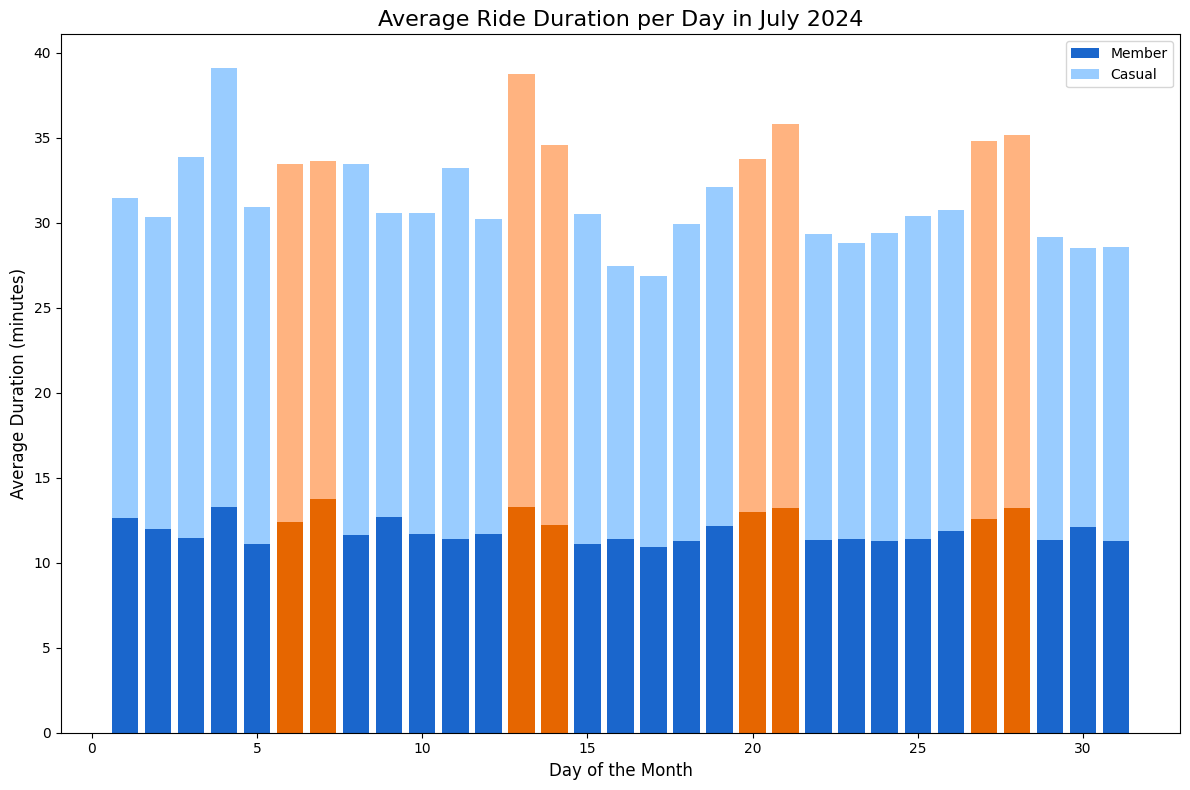

In [38]:
df_july = df
grouped_data = df_july.groupby(['ride_day', 'member_casual', 'is_weekend'])['duration_minutes'].mean().unstack('member_casual', fill_value=0).reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define custom RGB colors for member and casual
color_member_weekday = (0.1, 0.4, 0.8)  # Darker blue for member (weekday)
color_casual_weekday = (0.6, 0.8, 1.0)  # Lighter blue for casual (weekday)
color_member_weekend = (0.9, 0.4, 0.0)  # Darker orange for member (weekend)
color_casual_weekend = (1.0, 0.7, 0.5)  # Lighter orange for casual (weekend)

# Loop through the grouped data and plot the bars
for index, row in grouped_data.iterrows():
    day = row['ride_day']
    is_weekend = row['is_weekend']
    member_duration = row.get('member', 0)
    casual_duration = row.get('casual', 0)

    # Determine the colors based on weekend or weekday
    if is_weekend:
        member_color = color_member_weekend
        casual_color = color_casual_weekend
    else:
        member_color = color_member_weekday
        casual_color = color_casual_weekday

    # Plot the bars for member and casual, stacking casual on top of member
    ax.bar(day, member_duration, color=member_color, label='Member' if index == 0 else "")
    ax.bar(day, casual_duration, bottom=member_duration, color=casual_color, label='Casual' if index == 0 else "")

# Add labels and title
ax.set_xlabel('Day of the Month', fontsize=12)
ax.set_ylabel('Average Duration (minutes)', fontsize=12)
ax.set_title('Average Ride Duration per Day in July 2024', fontsize=16)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

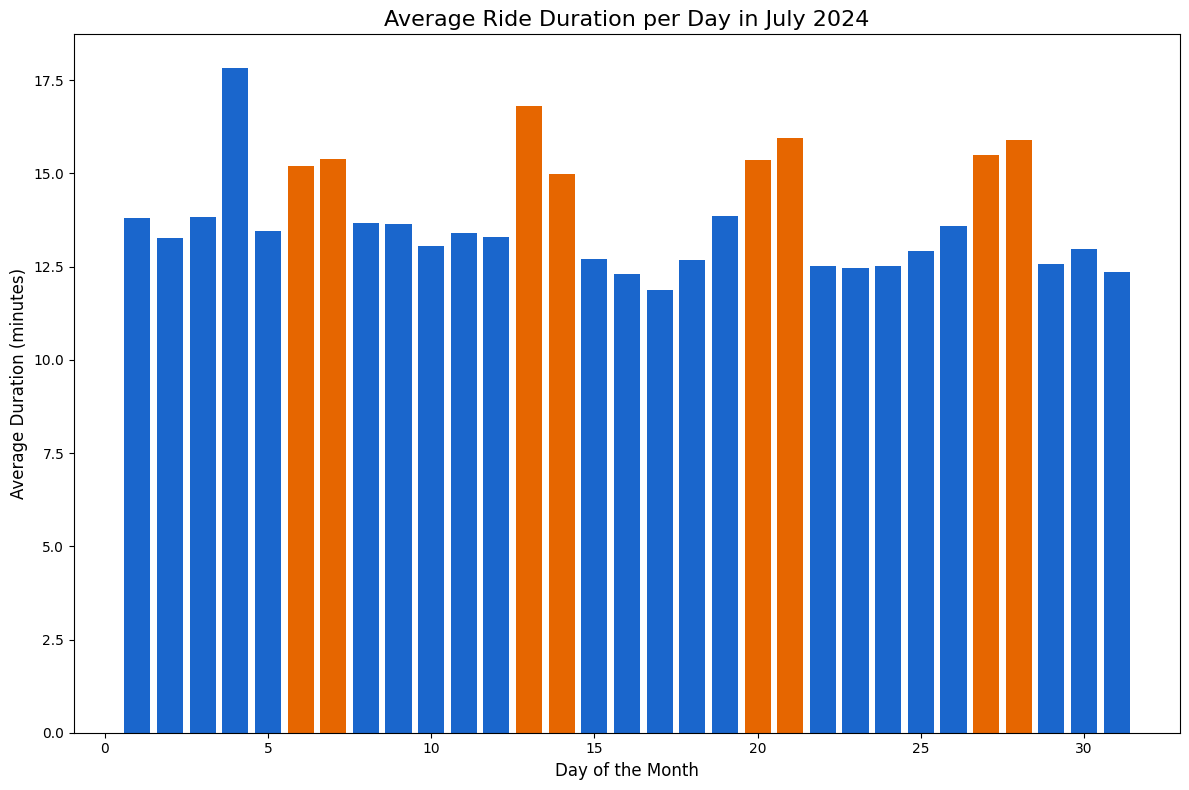

In [39]:
df_july = df
grouped_data = df_july.groupby(['ride_day', 'is_weekend'])['duration_minutes'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define custom RGB colors for weekdays and weekends
color_weekday = (0.1, 0.4, 0.8)  # Blue for weekday
color_weekend = (0.9, 0.4, 0.0)  # Orange for weekend

# Loop through the grouped data and plot the bars
for index, row in grouped_data.iterrows():
    day = row['ride_day']
    is_weekend = row['is_weekend']
    avg_duration = row['duration_minutes']

    # Determine the color based on weekend or weekday
    color = color_weekend if is_weekend else color_weekday

    # Plot the bar for the average duration
    ax.bar(day, avg_duration, color=color)

# Add labels and title
ax.set_xlabel('Day of the Month', fontsize=12)
ax.set_ylabel('Average Duration (minutes)', fontsize=12)
ax.set_title('Average Ride Duration per Day in July 2024', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()